In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

In [3]:
(train_img, train_label), (test_img, test_label) = cifar10.load_data()

In [8]:
train_img.shape, train_label.shape

((50000, 32, 32, 3), (50000, 1))

In [7]:
test_img.shape, test_label.shape

((10000, 32, 32, 3), (10000, 1))

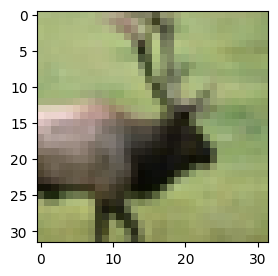

In [11]:
plt.figure(figsize=(3, 3))
plt.imshow(train_img[34])
plt.show()

In [12]:
train_label[34]

array([4], dtype=uint8)

In [13]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [16]:
classes[train_label[34][0]]

'deer'

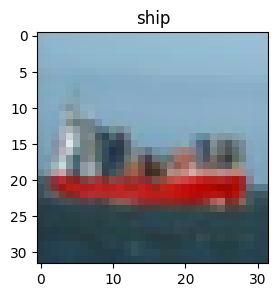

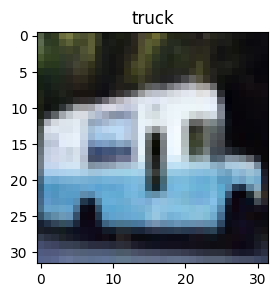

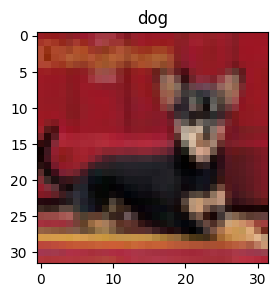

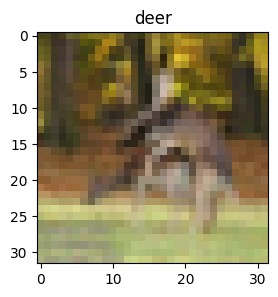

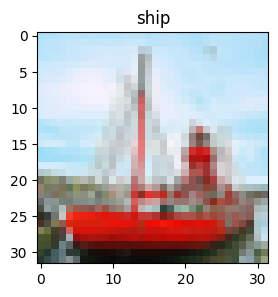

In [18]:
for i in range(5):
    index = np.random.randint(0, 50000)
    plt.figure(figsize=(3, 3))
    plt.imshow(train_img[index])
    plt.title(classes[train_label[index][0]])
    plt.show()

In [19]:
train_img[34]

array([[[172, 187, 130],
        [171, 186, 130],
        [168, 182, 126],
        ...,
        [158, 170, 113],
        [156, 169, 113],
        [147, 163, 107]],

       [[169, 185, 123],
        [168, 183, 122],
        [168, 184, 123],
        ...,
        [158, 175, 114],
        [152, 170, 110],
        [145, 165, 107]],

       [[174, 190, 126],
        [169, 185, 122],
        [170, 186, 123],
        ...,
        [157, 177, 115],
        [149, 170, 108],
        [146, 168, 109]],

       ...,

       [[150, 163, 100],
        [157, 168, 103],
        [162, 170, 104],
        ...,
        [158, 168, 108],
        [147, 160,  99],
        [139, 154,  90]],

       [[143, 154,  89],
        [149, 158,  90],
        [155, 161,  96],
        ...,
        [148, 157,  99],
        [143, 153,  92],
        [140, 153,  88]],

       [[148, 158,  93],
        [146, 155,  89],
        [149, 157,  92],
        ...,
        [137, 143,  86],
        [134, 139,  80],
        [136, 143,  82]]

In [20]:
train_img.min(), train_img.max()

(0, 255)

In [21]:
train_img[34]/255.

array([[[0.6745098 , 0.73333333, 0.50980392],
        [0.67058824, 0.72941176, 0.50980392],
        [0.65882353, 0.71372549, 0.49411765],
        ...,
        [0.61960784, 0.66666667, 0.44313725],
        [0.61176471, 0.6627451 , 0.44313725],
        [0.57647059, 0.63921569, 0.41960784]],

       [[0.6627451 , 0.7254902 , 0.48235294],
        [0.65882353, 0.71764706, 0.47843137],
        [0.65882353, 0.72156863, 0.48235294],
        ...,
        [0.61960784, 0.68627451, 0.44705882],
        [0.59607843, 0.66666667, 0.43137255],
        [0.56862745, 0.64705882, 0.41960784]],

       [[0.68235294, 0.74509804, 0.49411765],
        [0.6627451 , 0.7254902 , 0.47843137],
        [0.66666667, 0.72941176, 0.48235294],
        ...,
        [0.61568627, 0.69411765, 0.45098039],
        [0.58431373, 0.66666667, 0.42352941],
        [0.57254902, 0.65882353, 0.42745098]],

       ...,

       [[0.58823529, 0.63921569, 0.39215686],
        [0.61568627, 0.65882353, 0.40392157],
        [0.63529412, 0

In [22]:
train_img, test_img = train_img/255., test_img/255.

In [23]:
train_img[34]

array([[[0.6745098 , 0.73333333, 0.50980392],
        [0.67058824, 0.72941176, 0.50980392],
        [0.65882353, 0.71372549, 0.49411765],
        ...,
        [0.61960784, 0.66666667, 0.44313725],
        [0.61176471, 0.6627451 , 0.44313725],
        [0.57647059, 0.63921569, 0.41960784]],

       [[0.6627451 , 0.7254902 , 0.48235294],
        [0.65882353, 0.71764706, 0.47843137],
        [0.65882353, 0.72156863, 0.48235294],
        ...,
        [0.61960784, 0.68627451, 0.44705882],
        [0.59607843, 0.66666667, 0.43137255],
        [0.56862745, 0.64705882, 0.41960784]],

       [[0.68235294, 0.74509804, 0.49411765],
        [0.6627451 , 0.7254902 , 0.47843137],
        [0.66666667, 0.72941176, 0.48235294],
        ...,
        [0.61568627, 0.69411765, 0.45098039],
        [0.58431373, 0.66666667, 0.42352941],
        [0.57254902, 0.65882353, 0.42745098]],

       ...,

       [[0.58823529, 0.63921569, 0.39215686],
        [0.61568627, 0.65882353, 0.40392157],
        [0.63529412, 0

In [31]:
train_img.shape

(50000, 32, 32, 3)

In [26]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1000, activation="relu"),
    Dense(512, activation="relu"),
    Dense(300, activation="relu"),
    Dense(200, activation="relu"),
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(10, activation="softmax")
])

In [32]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [33]:
model.fit(train_img, train_label, epochs=30, batch_size=64, validation_data=(test_img, test_label))

Epoch 1/30
782/782 [==============================] - 31s 38ms/step - loss: 1.9464 - accuracy: 0.2805 - val_loss: 1.8123 - val_accuracy: 0.3363
Epoch 2/30
782/782 [==============================] - 29s 37ms/step - loss: 1.7481 - accuracy: 0.3668 - val_loss: 1.6869 - val_accuracy: 0.3899
Epoch 3/30
782/782 [==============================] - 30s 38ms/step - loss: 1.6547 - accuracy: 0.4030 - val_loss: 1.6068 - val_accuracy: 0.4242
Epoch 4/30
782/782 [==============================] - 30s 38ms/step - loss: 1.5892 - accuracy: 0.4274 - val_loss: 1.5537 - val_accuracy: 0.4510
Epoch 5/30
782/782 [==============================] - 30s 38ms/step - loss: 1.5328 - accuracy: 0.4493 - val_loss: 1.5297 - val_accuracy: 0.4549
Epoch 6/30
782/782 [==============================] - 31s 40ms/step - loss: 1.4901 - accuracy: 0.4623 - val_loss: 1.5270 - val_accuracy: 0.4566
Epoch 7/30
782/782 [==============================] - 31s 39ms/step - loss: 1.4570 - accuracy: 0.4773 - val_loss: 1.4685 - val_accuracy:

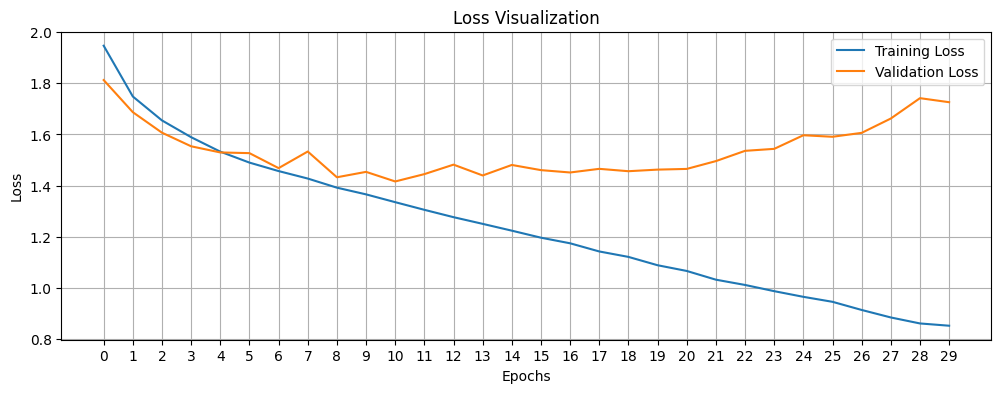

In [42]:
plt.figure(figsize=(12, 4))
plt.plot(model.history.history["loss"], label="Training Loss")
plt.plot(model.history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.xticks(range(0, 30))
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

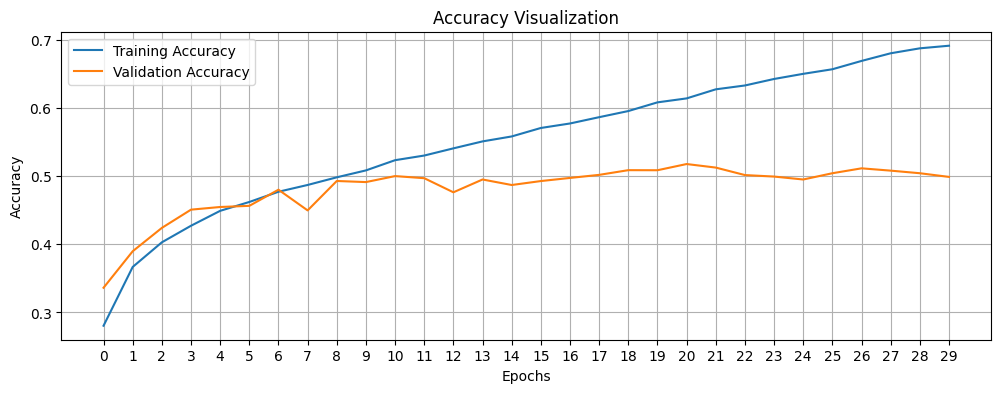

In [40]:
plt.figure(figsize=(12, 4))
plt.plot(model.history.history["accuracy"], label="Training Accuracy")
plt.plot(model.history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.grid()
plt.xticks(range(0, 30))
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [45]:
def predict_image(path):
    img = load_img(path, target_size=(32, 32))
    img_arr = img_to_array(img)/255.
    flatten_img = np.expand_dims(img_arr, axis=0)
    predicted = model.predict(flatten_img)
    pred_index = np.argmax(predicted)
    acc = f"Accuracy {np.round(predicted.max()*100, decimals=2)}%"
    return classes[pred_index], acc

In [46]:
predict_image("tata curve.jpeg")

1/1 [==============================] - 0s 27ms/step


('automobile', 'Accuracy 82.75%')

In [47]:
predict_image("Suzuki_Brezza.jpg")

1/1 [==============================] - 0s 25ms/step


('automobile', 'Accuracy 82.21%')

In [48]:
predict_image("deer.jpg")

1/1 [==============================] - 0s 27ms/step


('deer', 'Accuracy 92.7%')

In [49]:
predict_image("A_chital_stag_1.jpeg")

1/1 [==============================] - 0s 25ms/step


('deer', 'Accuracy 34.69%')

In [50]:
predict_image("ship image.jpg")

1/1 [==============================] - 0s 29ms/step


('ship', 'Accuracy 84.01%')